<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 


#**Artificial Intelligence - MSc**
##CS6271 - Evolutionary Agorithms and Humanoid Robotics 
###DEAP_GE code running regression problems


Leader: Conor Ryan

Developer: Allan De Lima

Tester: Enrique Naredo

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone this repository in which we have all functions and classes created or adapted to this work.

In [ ]:
import os.path

PATH = '/content/drive/MyDrive/deap_ge/'
if os.path.exists(PATH):
    print('deap_ge directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/danozu/deap_ge.git 
    print('Cloning deap_ge in your Drive')

%cd /content/drive/MyDrive/deap_ge/

/content/drive/MyDrive
Cloning into 'deap_ge'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 77 (delta 38), reused 55 (delta 19), pack-reused 0
Unpacking objects: 100% (77/77), done.
Cloning deap_ge in your Drive
/content/drive/MyDrive/deap_ge


Import adapted functions and classes from PonyGE2.

Import our algorithms, adapted from deap.algorithms.

Import DEAP (maybe it can be necessary to run the installation before that).

Import functions used by our grammars.



In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install deap==1.3 
from ponyge2_adapted_files import Grammar, ge
from functions import div, plog, psqrt, exp
import algorithms

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools

     |████████████████████████████████| 152 kB 5.2 MB/s 


#Pagie-1 function

#$\frac{1}{1 + x_1^{-4}} + \frac{1}{1 + x_2^{-4}}$

##Training set: E[−5, 5, 0.4]

##Test set: E[−5, 5, 0.1]




#Vladislavleva-4 function

#$\frac{10}{5 + (x_0 - 3)^2 + (x_1 - 3)^2 + (x_2 - 3)^2 + (x_3 - 3)^2 + (x_4 - 3)^2}$

##Training set: U[0.05, 0.05, 1024]

##Test set: U[−0.25, 6.35, 5000]

Set a regression problem to solve. For now, we can choose among 'pagie1', 'vladislavleva4', 'randomData' and 'Dow'.

In [ ]:
problem = 'vladislavleva4'

Read datasets and grammars according to the problem picked in the previous cell.

In [ ]:
if problem == 'pagie1':
    X_train = np.zeros([2,676], dtype=float)
    Y_train = np.zeros([676,], dtype=float)

    data_train = pd.read_table(r"datasets/Pagie1_train.txt")
    for i in range(2):
        for j in range(676):
            X_train[i,j] = data_train['x'+ str(i)].iloc[j]
    for i in range(676):
        Y_train[i] = data_train['response'].iloc[i]

    X_test = np.zeros([2,10000], dtype=float)
    Y_test = np.zeros([10000,], dtype=float)

    data_test = pd.read_table(r"datasets/Pagie1_test.txt")
    for i in range(2):
        for j in range(10000):
            X_test[i,j] = data_test['x'+ str(i)].iloc[j]
    for i in range(10000):
        Y_test[i] = data_test['response'].iloc[i]

    GRAMMAR_FILE = 'Pagie1.bnf'
  
elif problem == 'vladislavleva4':
  X_train = np.zeros([5,1024], dtype=float)
  Y_train = np.zeros([1024,], dtype=float)

  data_train = pd.read_table(r"datasets/Vladislavleva4_train.txt")
  for i in range(5):
      for j in range(1024):
            X_train[i,j] = data_train['x'+ str(i)].iloc[j]
  for i in range(1024):
      Y_train[i] = data_train['response'].iloc[i]

  X_test = np.zeros([5,5000], dtype=float)
  Y_test = np.zeros([5000,], dtype=float)

  data_test = pd.read_table(r"datasets/Vladislavleva4_test.txt")
  for i in range(5):
      for j in range(5000):
          X_test[i,j] = data_test['x'+ str(i)].iloc[j]
  for i in range(5000):
      Y_test[i] = data_test['response'].iloc[i]

  GRAMMAR_FILE = 'Vladislavleva4.bnf'

elif problem == 'randomData':
  X_train = np.zeros([5,100], dtype=float)
  Y_train = np.zeros([100,], dtype=float)

  data_train = pd.read_table(r"datasets/randomData_train.csv")
  for i in range(5):
      for j in range(100):
            X_train[i,j] = data_train['x'+ str(i)].iloc[j]
  for i in range(100):
      Y_train[i] = data_train['response'].iloc[i]

  X_test = np.zeros([5,50], dtype=float)
  Y_test = np.zeros([50,], dtype=float)

  data_test = pd.read_table(r"datasets/randomData_test.csv")
  for i in range(5):
      for j in range(50):
          X_test[i,j] = data_test['x'+ str(i)].iloc[j]
  for i in range(50):
      Y_test[i] = data_test['response'].iloc[i]

  GRAMMAR_FILE = 'randomData.bnf'

elif problem == 'Dow':
  X_train = np.zeros([57,747], dtype=float)
  Y_train = np.zeros([747,], dtype=float)

  data_train = pd.read_table(r"datasets/DowNorm_train.txt")
  for i in range(56):
      for j in range(747):
            X_train[i,j] = data_train['x'+ str(i+1)].iloc[j]
  for i in range(747):
      Y_train[i] = data_train['y'].iloc[i]

  X_test = np.zeros([57,319], dtype=float)
  Y_test = np.zeros([319,], dtype=float)

  data_test = pd.read_table(r"datasets/DowNorm_test.txt")
  for i in range(56):
      for j in range(319):
          X_test[i,j] = data_test['x'+ str(i+1)].iloc[j]
  for i in range(319):
      Y_test[i] = data_test['y'].iloc[i]

  GRAMMAR_FILE = 'Dow.bnf'

Print train data.

In [ ]:
data_train.head()

,x0,x1,x2,x3,x4,response
0,5.218966,3.876326,4.584302,2.401454,5.577056,0.495019
1,0.844700,4.072181,5.281859,0.826522,4.136884,0.454168
2,5.905142,3.683363,2.239359,1.084997,5.487435,0.410847
3,2.389614,3.720735,5.800336,4.598508,6.019818,0.393570
4,2.793783,4.186196,2.983231,5.090598,1.479284,0.761438


Print test data.

In [ ]:
data_test.head()

,x0,x1,x2,x3,x4,response
0,6.223193,6.148210,3.329034,4.207257,4.498192,0.343519
1,4.582535,4.156828,1.034433,4.683383,4.049746,0.600894
2,5.525228,0.169733,0.032192,4.475964,1.768165,0.313568
3,4.260294,4.148641,0.034675,2.981893,4.975282,0.485368
4,5.751221,4.754240,0.692822,1.577736,0.665040,0.351562


Print grammar.

In [ ]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

<e>  ::=  <e>+<e>|
          <e>-<e>|
          <e>*<e>|
          div(<e>,<e>)|
          psqrt(<e>)|
          np.sin(<e>)|
          np.tanh(<e>)|
          exp(<e>)|
          plog(<e>)|
          x[0]|x[1]|x[2]|x[3]|x[4]|
          <c><c>.<c><c>
<c>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9




Set up the grammar addressed by GRAMMAR_FILE in the class Grammar.

In [ ]:
BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

Define the fitness function

In [ ]:
def fitness_eval(individual, points):
    #points = [X, Y]
    x = points[0]
    y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        fitness = np.mean(np.square(y - pred))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        fitness = np.NaN
    
    if fitness == float("inf"):
      return np.NaN,    
    return fitness,

Create the deap toolbox.

Use negative weights in the `base.Fitness` since we are trying to minimise the fitness.

`ge.Individual` is a class with the following attributes: `phenotype`, `genome`, `tree`, `nodes`, `invalid` (True or False), `depth` and `used_codons`.

Usually, when using deap, we initialise each individual independently, and then we repeat that until we fill out the whole population. However, since we are using Position Independent Grow Initialisation, we need to initialise all individuals simultaneously.

`ge.selTournament` prevents selecting invalid individuals.

`ge.crossover_onepoint` selects crossover points within the used portion of the genome. 

Similarly, `ge.mutation_int_flip_per_codon` performs only over the effective length.



In [ ]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)


Set our Grammatical Evolution parameters.

In [ ]:
POPULATION_SIZE = 2000
MAX_GENERATIONS = 500
P_CROSSOVER = 0.8
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

Set the main function and run it.

Set the statistics object regarding the fitness score, but there are other statistics defined internally.

Perform Grammatical Evolution using `algorithms.ge_eaSimple`, a simple evolutionary algorithm. The differences to the `algorithms.eaSimple` used by deap are:

*   We use elitism;
*   After crossover and mutation, we check the offspring to assure that the max tree depth is not achieved;
*   We measure the generation and the selection times;
*   We count the number of invalid individuals.

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

import math 
# prepare the statistics object:
#stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
#stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)# if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg        	std        	min      	max        	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	2.73718e+67	7.41569e+68	0.0391488	2.01183e+70	0.0399985   	10             	22.721    	196       	0             	0.215101       
1  	619    	4.81698e+69	1.28533e+71	0.0391488	3.43451e+72	0.0399985   	10             	21.725    	151       	0.0327222     	2.02635        
2  	274    	3.74129e+69	1.13294e+71	0.0391488	3.43451e+72	0.0399985   	10             	20.609    	146       	0.0306885     	0.429493       
3  	191    	3.96522e+27	1.24384e+29	0.0372441	3.90574e+30	0.0383325   	36             	21.782    	148       	0.0375297     	0.456979       
4  	126    	208744     	6.75767e+06	0.0372441	2.19806e+08	0.0383325   	36             	23.3105   	160       	0.0293946     	0.452627       
5  	91     	197381     	6.58267e+06	0.035619 	2.19806e+08	0.0392831   	7              	23.2455   	130       	0.0336637     	0.492963       
6  	105    	1.72971e

Extract statistics and build a beautiful table.

In [ ]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,2.737180e+67,7.415688e+68,0.039149,2.011827e+70,0.039998,10,22.7210,196,0.000000,0.215101
1,1,619,4.816980e+69,1.285331e+71,0.039149,3.434507e+72,0.039998,10,21.7250,151,0.032722,2.026353
2,2,274,3.741293e+69,1.132939e+71,0.039149,3.434507e+72,0.039998,10,20.6090,146,0.030689,0.429493
3,3,191,3.965218e+27,1.243840e+29,0.037244,3.905740e+30,0.038332,36,21.7820,148,0.037530,0.456979
4,4,126,2.087440e+05,6.757670e+06,0.037244,2.198062e+08,0.038332,36,23.3105,160,0.029395,0.452627
5,5,91,1.973814e+05,6.582671e+06,0.035619,2.198062e+08,0.039283,7,23.2455,130,0.033664,0.492963
6,6,105,1.729709e+71,5.749819e+72,0.035619,1.913058e+74,0.039283,7,23.4340,130,0.036823,0.480407
7,7,67,1.514442e+71,5.117826e+72,0.034430,1.731007e+74,0.036139,8,23.7095,146,0.033599,0.520989
8,8,63,3.016786e+02,1.011910e+04,0.034430,3.513920e+05,0.036139,8,24.1425,145,0.032179,0.501255
9,9,63,2.705591e+55,9.426958e+56,0.034125,3.287294e+58,0.033956,14,24.4560,129,0.035524,0.550952


Show the best individual as an expression and other statistics values.

In [ ]:
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 psqrt(np.sin(psqrt(x[1])))*psqrt(np.sin(psqrt(x[0])))*psqrt(np.sin(psqrt(x[2]))*
np.sin(psqrt(x[3]))*np.sin(psqrt(x[4]))*psqrt(psqrt(np.sin(psqrt(x[0]))*psqrt(np
.sin(psqrt(x[2]))*np.sin(psqrt(x[2]))*np.sin(psqrt(x[3]))*np.sin(psqrt(x[1])))*p
sqrt(np.sin(psqrt(x[0]))))*psqrt(np.sin(psqrt(x[2]))*np.sin(psqrt(x[3]))*np.sin(
psqrt(x[4]))*np.sin(psqrt(x[1])))))

Training Fitness:  0.009830726472073153
Test Fitness:  0.013096384479528015
Depth:  17
Length of the genome:  267
Used portion of the genome: 0.25


Plot graphs regarding the best individual in each generations considering the training set and the test set.

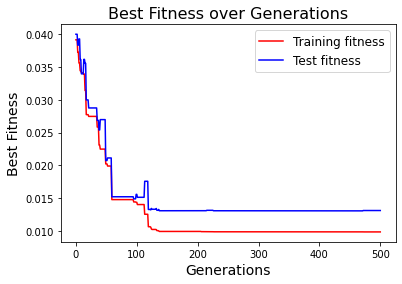

In [ ]:
# Extract statistics to plot graphs:


plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()


Plot graphs regarding the length of the genome: the maximum value, the average of the population and that one of the best individual.



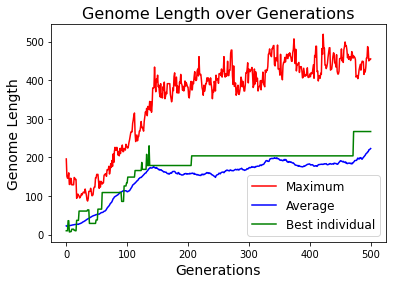

In [ ]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()